# Prediction Model for SWAPI Data

### Import training data

In [3]:
import pandas as pd

main_df = pd.read_csv('troop_movements.csv')
main_df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:45:34,1,tie_fighter,resistance,6,9,6,7,Chandrila
1,2024-02-06 16:45:33,2,stormtrooper,resistance,8,2,3,6,Ryloth
2,2024-02-06 16:45:32,3,tie_fighter,resistance,2,6,8,7,Rodia
3,2024-02-06 16:45:31,4,tie_fighter,resistance,5,3,2,9,Chandrila
4,2024-02-06 16:45:30,5,x-wing,empire,8,4,10,3,Aleen Minor
...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:28:59,996,unknown,resistance,10,10,2,6,Shili
996,2024-02-06 16:28:58,997,tie_silencer,resistance,9,10,9,9,Dorin
997,2024-02-06 16:28:57,998,tie_fighter,empire,5,5,9,10,Chandrila
998,2024-02-06 16:28:56,999,stormtrooper,empire,10,9,6,2,Skako


### Create grouped data showing counts of empire v resistance

In [7]:
df_count = main_df['empire_or_resistance'].value_counts().reset_index()
df_count.columns = ['alignment', 'count']
df_count

,alignment,count
0,empire,505
1,resistance,495


###  Create grouped data showing counts of characters by homeworld

In [8]:
df_homeworld = main_df['homeworld'].value_counts().reset_index()
df_homeworld.columns = ['homeworld', 'count']
df_homeworld

,homeworld,count
0,Troiken,34
1,Haruun Kal,32
2,Iridonia,32
3,Kalee,32
4,Muunilinst,31
5,Glee Anselm,31
6,Chandrila,30
7,Stewjon,30
8,Concord Dawn,30
9,Tund,27


### Create grouped data showing counts of characters by unit_type

In [9]:
df_units = main_df['unit_type'].value_counts().reset_index()
df_units.columns = ['unit_type', 'count']
df_units

,unit_type,count
0,resistance_soldier,135
1,unknown,135
2,tie_fighter,133
3,at-st,130
4,tie_silencer,128
5,x-wing,121
6,at-at,112
7,stormtrooper,106


### Engineer a new feature called is_resistance with a True or False value based on empire_or_resistance

In [12]:
main_df2 = main_df.copy()
main_df2['is_resistance'] = main_df2['empire_or_resistance'].apply(lambda align: True if align == 'resistance' else False)
main_df2

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:45:34,1,tie_fighter,resistance,6,9,6,7,Chandrila,True
1,2024-02-06 16:45:33,2,stormtrooper,resistance,8,2,3,6,Ryloth,True
2,2024-02-06 16:45:32,3,tie_fighter,resistance,2,6,8,7,Rodia,True
3,2024-02-06 16:45:31,4,tie_fighter,resistance,5,3,2,9,Chandrila,True
4,2024-02-06 16:45:30,5,x-wing,empire,8,4,10,3,Aleen Minor,False
...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:28:59,996,unknown,resistance,10,10,2,6,Shili,True
996,2024-02-06 16:28:58,997,tie_silencer,resistance,9,10,9,9,Dorin,True
997,2024-02-06 16:28:57,998,tie_fighter,empire,5,5,9,10,Chandrila,False
998,2024-02-06 16:28:56,999,stormtrooper,empire,10,9,6,2,Skako,False


### Create a bar plot using Seaborn showing Empire vs Resistance distribution

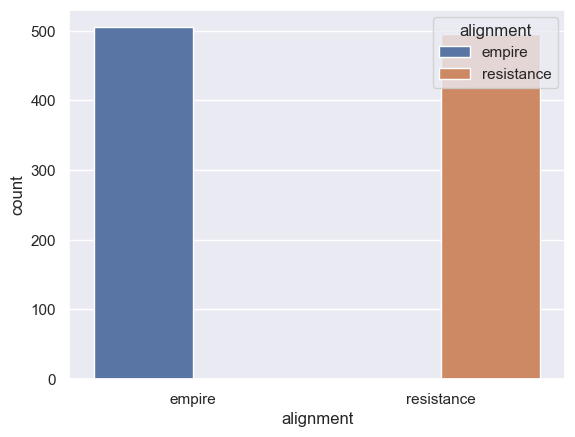

In [16]:
import seaborn as sns

sns.set()
alignment_plot = sns.barplot(x='alignment', y='count', hue='alignment', data=df_count)

### Create a prediction model using sklearn.tree.DecisionTreeClassifier that predicts if a character is joining either the Empire or the Resistance based on their homeworld and unit_type

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = main_df2

X = df[['homeworld', 'unit_type']]
y = df['is_resistance']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Accuracy: 0.675


### Create a bar plot that shows feature importance

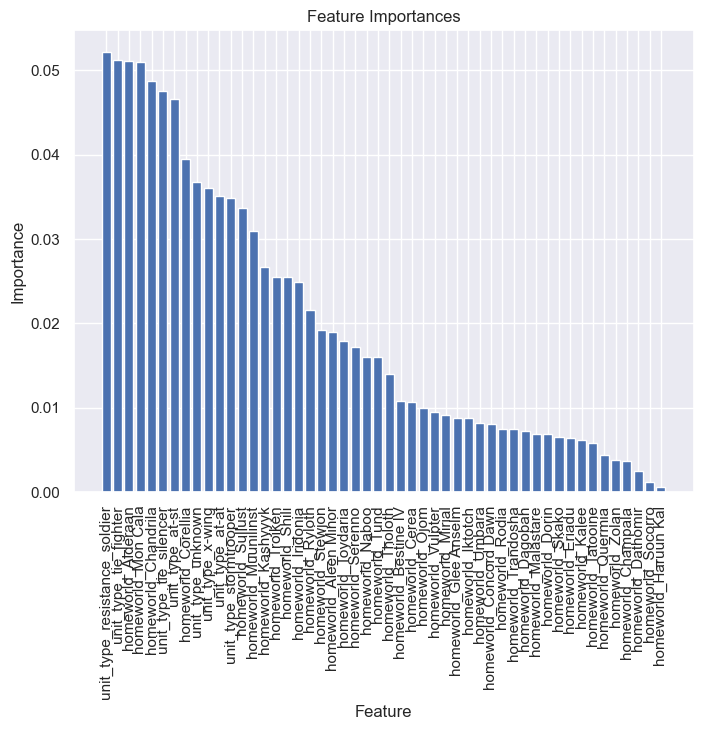

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importances

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Save to model as a pickle file named trained_model.pkl.

In [28]:
import pickle

filename = "trained_model.pkl"
with open(filename, 'wb') as file:
      pickle.dump(model, file)
